# SMA & EMA Indicator

,Unnamed: 0,Date,Open,High,Low,Close,Quantity,pnl,SMA,EMA
0,0,1/1/2024,100,102,98,111,100,1100,1100.000000,1100.000000
1,1,1/2/2024,101,103,99,112,105,1155,1127.500000,1133.000000
2,2,1/3/2024,102,104,100,113,100,1100,1118.333333,1117.368421
3,3,1/4/2024,103,105,101,114,86,946,1075.250000,1046.184615
4,4,1/5/2024,104,106,102,115,99,1089,1078.000000,1062.620853
5,5,1/6/2024,105,107,103,116,101,1111,1083.500000,1080.299248
6,6,1/7/2024,106,108,104,117,110,1210,1101.571429,1126.220495
7,7,1/8/2024,107,109,105,118,120,1320,1128.875000,1193.436320
8,8,1/9/2024,108,110,106,119,115,1265,1144.000000,1217.927964
9,9,1/10/2024,109,111,107,120,103,1133,1142.900000,1189.119052


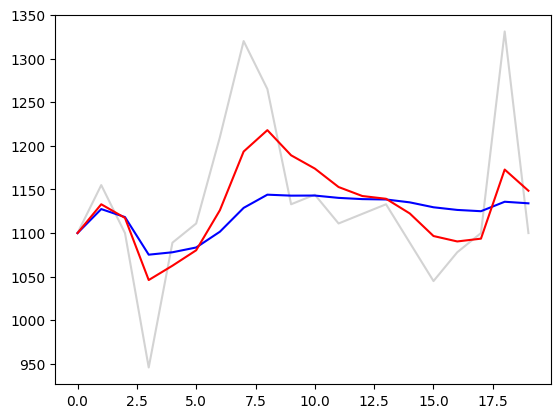

In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/stockdata.csv')

df['pnl'] = (df['Close'] - df['Open'])*df['Quantity']

#df['SMA']=df['pnl'].rolling(window=3).mean()
df['SMA']=df['pnl'].expanding().mean()
df['EMA']=df['pnl'].ewm(span=5).mean()

df['pnl'].plot(c='lightgrey')
df['SMA'].plot(c='blue')
df['EMA'].plot(c='red')

plt.show
df

# RSI Indicator

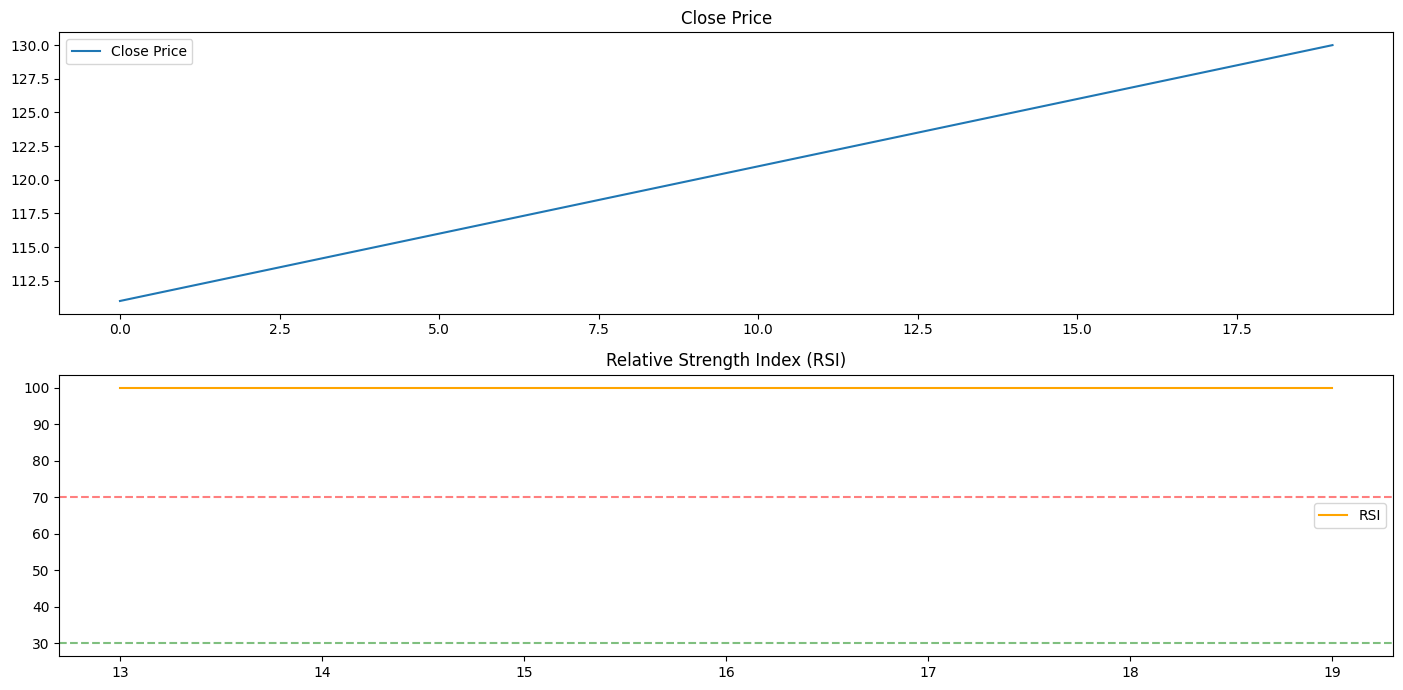

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

data = pd.read_csv('Desktop/stockdata.csv')

data['RSI'] = calculate_rsi(data['Close'])

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()


# MCAD Indicator

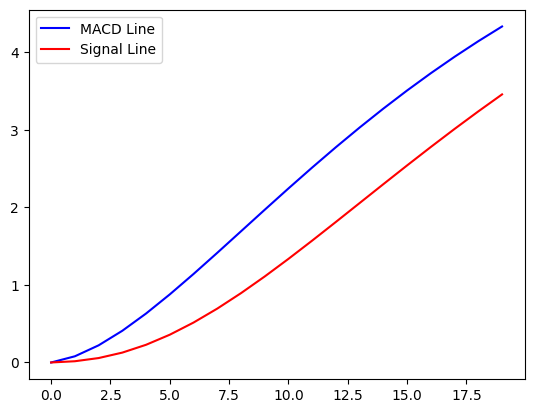

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):

    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()

    macd_line = short_ema - long_ema

    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

data = pd.read_csv('Desktop/stockdata.csv')
    
data['MACD_Line'], data['Signal_Line'], data['MACD_Histogram'] = calculate_macd(data['Close'])

plt.plot(data['MACD_Line'], label='MACD Line', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='red')
plt.legend()
plt.show()

# Cs-mfi Indicator

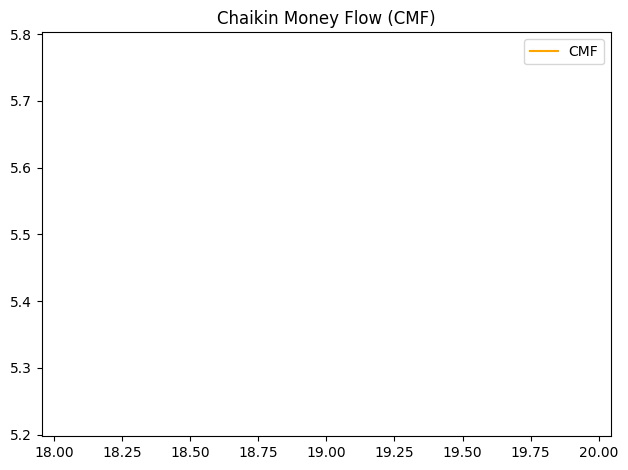

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_cmf(data, window=20):
    mf_multiplier = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    mf_multiplier = mf_multiplier.fillna(0)
    mf_volume = mf_multiplier * data['Quantity']
    cmf = mf_volume.rolling(window=window).sum() / data['Quantity'].rolling(window=window).sum()
    return cmf

data = pd.read_csv('Desktop/stockdata.csv')

data['CMF'] = calculate_cmf(data)

plt.plot(data['CMF'], label='CMF', color='orange')
plt.title('Chaikin Money Flow (CMF)')
plt.legend()
plt.tight_layout()
plt.show()

# Kelter channel

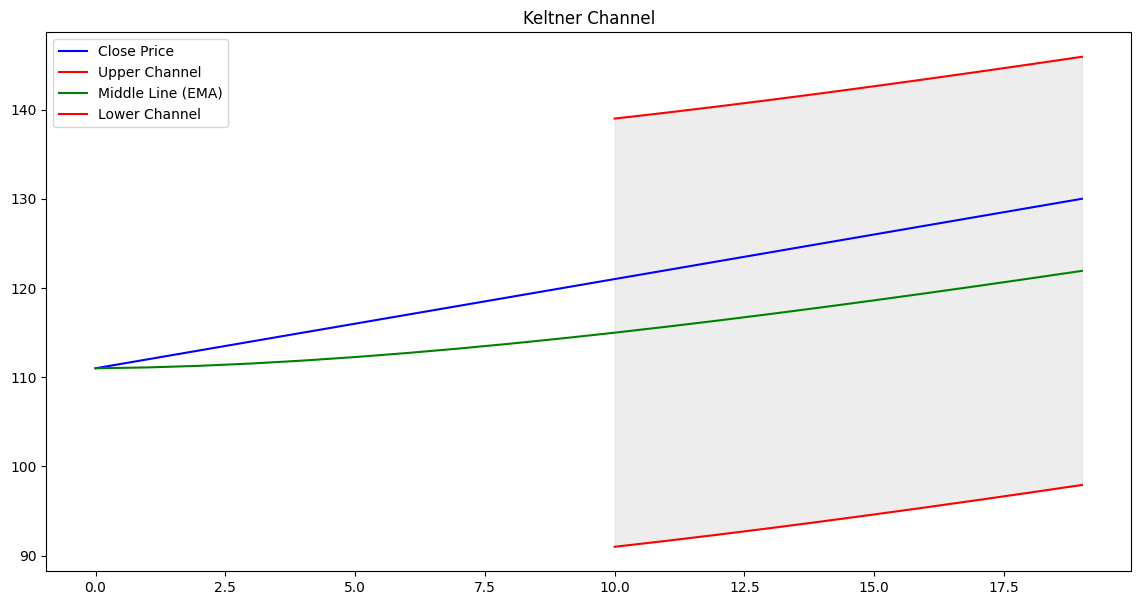

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_keltner_channel(data, ema_period=20, atr_period=10, atr_multiplier=2):

    ema = data['Close'].ewm(span=ema_period, adjust=False).mean()
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    tr = high_low.combine(high_close, np.maximum).combine(low_close, np.maximum)
    
    atr = tr.rolling(window=atr_period).mean()

    middle_line = ema
    upper_line = middle_line + (atr_multiplier * atr)
    lower_line = middle_line - (atr_multiplier * atr)
    
    keltner_channel = pd.DataFrame({
        'Upper': upper_line,
        'Middle': middle_line,
        'Lower': lower_line
    })
    
    return keltner_channel

data = pd.read_csv('Desktop/stockdata.csv')

required_columns = ['High', 'Low', 'Close']
if not all(column in data.columns for column in required_columns):
    raise ValueError("The data does not contain the necessary columns: 'High', 'Low', 'Close'.")

keltner_channel = calculate_keltner_channel(data)
data = data.join(keltner_channel)

plt.figure(figsize=(14, 7))

plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Upper'], label='Upper Channel', color='red')
plt.plot(data['Middle'], label='Middle Line (EMA)', color='green')
plt.plot(data['Lower'], label='Lower Channel', color='red')

plt.fill_between(data.index, data['Upper'], data['Lower'], color='lightgrey', alpha=0.4)

plt.title('Keltner Channel')
plt.legend()
plt.show()